1. Import Library


In [5]:
# Mengimpor library yang dibutuhkan
import pandas as pd #Menampilkan Data berbentuk DataFrame
import numpy as np # Menghitung perhitungan angka
from sklearn.model_selection import train_test_split # membagi dataset, misalnya 80%, 20%
from sklearn.ensemble import RandomForestRegressor  # Menggunakan Regressor untuk regresi
from sklearn.preprocessing import LabelEncoder, StandardScaler #Pelabelan DataTransform
from sklearn.metrics import mean_squared_error, r2_score # Evaluasi Pemodelan ML
import matplotlib.pyplot as plt # Menggambarkan Grafik/Chart

2. Memuat dataset

In [6]:
# Mengimpor dataset
data = pd.read_csv('dataset mobil.csv')

# Menampilkan beberapa baris pertama dataset
print("Dataset Preview:")
data.head()

Dataset Preview:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


3. Eksplorasi data

In [7]:
# Menampilkan informasi umum tentang dataset
print("Informasi Dataset:")
data.info()

# Mengecek jumlah nilai yang hilang di setiap kolom
print("\nJumlah Nilai Hilang:")
print(data.isnull().sum())

# Menampilkan statistik deskriptif
print("\nStatistik Dataset:")
data.describe()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB

Jumlah Nilai Hilang:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Statistik Dataset:


,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


4. Bagi data

In [19]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = data[features]
y = data['price']  # Assuming 'price' is your target variable column

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Ukuran Data Latih:", X_train.shape)
print("Ukuran Data Uji:", X_test.shape)

Ukuran Data Latih: (14372, 5)
Ukuran Data Uji: (3594, 5)


5. Visualisasi hasil

In [21]:
# Membuat dan melatih model RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model telah dilatih menggunakan RandomForestRegressor.")

Model telah dilatih menggunakan RandomForestRegressor.


In [27]:
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")



Evaluasi Model:
Mean Squared Error (MSE): 2177965.874317882
R² Score: 0.9028216646373503


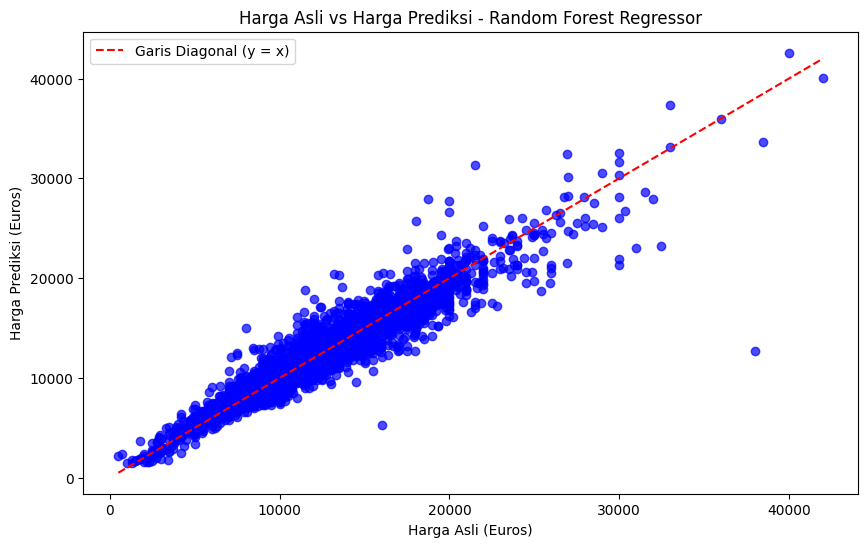

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Garis Diagonal (y = x)')
plt.xlabel("Harga Asli (Euros)")
plt.ylabel("Harga Prediksi (Euros)")
plt.title("Harga Asli vs Harga Prediksi - Random Forest Regressor")
plt.legend()
# Menampilkan plot
plt.show()
